In [18]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
from option_prediction import OUTPUT_FOLDER
from Option_Accuracy_Analysis import actual_prices

In [3]:
Company_Names = ["AMZN", "MSFT","AAPL", "TSLA","NFLX","FB","V","NVDA","GOOG","ZM","BA","INTC",'AMD',"F","GE","AAL",\
                 "DIS", "DAL", "CCL", "SNAP","UAL","BABA","UBER","TWTR","SBUX","SPY","QQQ","BYND","SQ","PENN",\
                 "XOM", "SHOP","ATVI","WMT","MRNA","JPM","GS","C","SNE","MGM"]


In [4]:
#set expiry date:
date_of_interest = '2020-09-11'

#specify days to go back, i.e. folders:
days_to_go_back = 5

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,MarketCap,Beta,50 Day MA,MA to TP %,Sharpe Ratio,30day Vol,95% VaR,predicted Direction
0,AAL,0,12.940000,14.093685,12.950000,8.915656,0.077282,8.838375,6.59604,1.75418,12.490200,-3.550578,-8.004599,4.232225,-13.98,Correct
1,AAL,1,13.005000,14.067043,12.950000,8.166418,-0.422917,8.589335,6.61384,1.75418,12.487300,-3.980777,-7.957495,4.239918,-13.98,False
2,AAL,2,13.050000,14.173824,12.950000,8.611678,-0.766286,9.377965,6.63672,1.75418,12.488600,-4.301917,-7.916577,4.312529,-14.01,False
3,AAL,3,13.630000,13.857185,12.950000,1.666800,-4.988997,6.655797,6.93169,1.75418,12.494000,-8.334557,-7.821663,4.408780,-13.96,False
4,AAL,4,13.610000,13.889963,12.950000,2.057040,-4.849374,6.906415,6.921515008,1.75418,12.469000,-8.383539,NaN,4.403063,-13.99,False
5,AAPL,0,111.790001,141.952810,112.000000,26.981670,0.187851,26.793818,1918.56,1.28484,108.755500,-2.896875,22.897724,2.889912,-5.68,Correct
6,AAPL,1,113.489998,143.868312,112.000000,26.767393,-1.312889,28.080282,1940.96,1.28484,108.336049,-4.541324,24.337897,2.838679,-5.66,False
7,AAPL,2,117.320000,142.757588,112.000000,21.682226,-4.534606,26.216832,2006.47,1.28484,107.890249,-8.037632,26.317654,2.809160,-5.64,False
8,AAPL,3,112.820000,149.480529,112.000000,32.494708,-0.726821,33.221529,1929.5,1.28484,107.352749,-4.845994,24.309789,2.636939,-5.62,False
9,AAPL,4,120.959999,156.336195,112.000000,29.246194,-7.407407,36.653600,2068.718419968,1.284838,106.864500,-11.653026,NaN,2.638353,-5.51,False


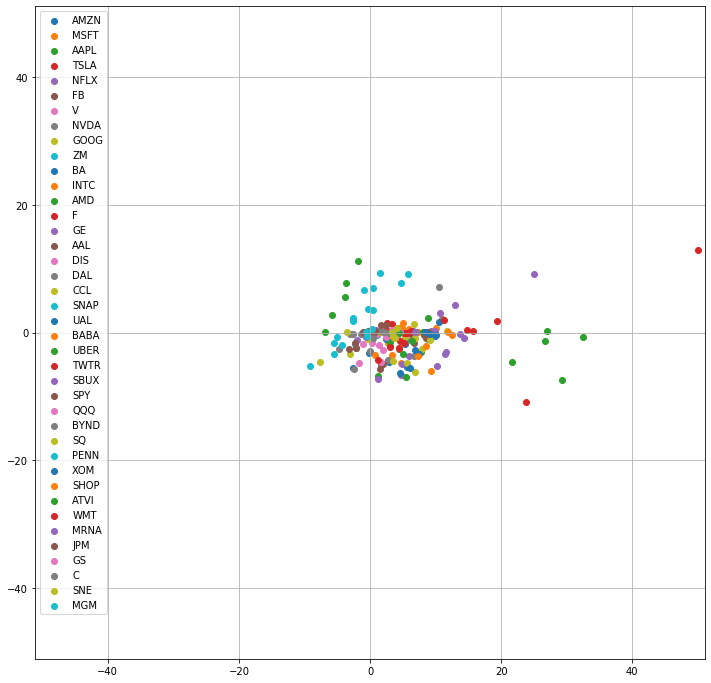

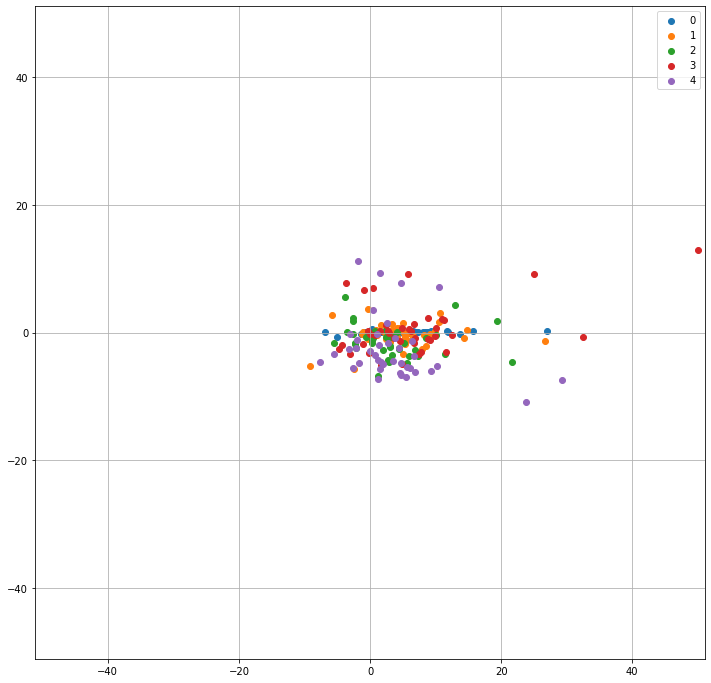

In [17]:
actual_prices(date_of_interest=date_of_interest, days_to_go_back=days_to_go_back, \
              Company_Names=Company_Names, OUTPUT_FOLDER=OUTPUT_FOLDER,\
              output_folder_cpsp=OUTPUT_FOLDER_CPSP, export_table=True)

In [47]:
#Index according to Ticker
ticker = "AMZN"

Option_Analysis_CPSPticker = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Tickers']== ticker, :]
Option_Analysis_CPSPticker_reset = Option_Analysis_CPSPticker.reset_index(drop=True)
Option_Analysis_CPSPticker_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,0,3293.439941,3475.001310,3294.620117,5.512819,0.035834,5.476984,5.475022,105.475022
1,AMZN,2,3531.449951,3470.421174,3294.620117,-1.728151,-6.706306,4.978155,5.336004,105.336004
2,AMZN,3,3499.120117,3443.792754,3294.620117,-1.581179,-5.844326,4.263147,4.527764,104.527764
3,AMZN,4,3450.959961,3417.904497,3294.620117,-0.957863,-4.530329,3.572466,3.741991,103.741991
4,AMZN,7,3399.500000,3399.763363,3294.620117,0.007747,-3.085156,3.092903,3.191362,103.191362
5,AMZN,8,3400.000000,3321.715738,3294.620117,-2.302478,-3.099408,0.796930,0.822420,100.822420
6,AMZN,9,3441.850098,3274.629015,3294.620117,-4.858465,-4.277641,-0.580824,-0.606780,99.393220
7,AMZN,10,3348.800049,3275.012942,3294.620117,-2.203389,-1.617891,-0.585499,-0.595127,99.404873
8,AMZN,11,3299.659912,3222.427280,3294.620117,-2.340624,-0.152737,-2.187887,-2.191234,97.808766


In [48]:
Option_Analysis_CPSPticker_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,6.000000,3407.197781,3366.740897,3294.620117,-1.161287,-3.253107,2.091820,2.189047,102.189047
std,3.872983,82.938854,94.780934,0.000000,2.826164,2.357837,2.783952,2.876840,2.876840
min,0.000000,3293.439941,3222.427280,3294.620117,-4.858465,-6.706306,-2.187887,-2.191234,97.808766
25%,3.000000,3348.800049,3275.012942,3294.620117,-2.302478,-4.530329,-0.580824,-0.595127,99.404873
50%,7.000000,3400.000000,3399.763363,3294.620117,-1.728151,-3.099408,3.092903,3.191362,103.191362
75%,9.000000,3450.959961,3443.792754,3294.620117,-0.957863,-1.617891,4.263147,4.527764,104.527764
max,11.000000,3531.449951,3475.001310,3294.620117,5.512819,0.035834,5.476984,5.475022,105.475022


In [14]:
#Index according to Days to Expiry
y = 3

Option_Analysis_CPSP_days = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== y, :]
Option_Analysis_CPSP_days_reset = Option_Analysis_CPSP_days.reset_index(drop=True)
Option_Analysis_CPSP_days_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AAL,3,13.100000,13.806452,13.610000,5.392759,3.893124,1.499634,1.443440,101.443440
1,AMD,3,92.180000,87.985488,82.010002,-4.550350,-11.032760,6.482410,7.286289,107.286289
2,AMZN,3,3499.120117,3443.792754,3294.620117,-1.581179,-5.844326,4.263147,4.527764,104.527764
3,ATVI,3,83.330002,82.274886,79.010002,-1.266190,-5.184207,3.918017,4.132241,104.132241
4,BA,3,172.100006,178.593533,171.050003,3.773112,-0.610112,4.383225,4.410131,104.410131
5,BABA,3,298.000000,282.910005,281.390015,-5.063757,-5.573821,0.510064,0.540172,100.540172
6,BYND,3,135.240005,132.936755,125.820000,-1.703084,-6.965399,5.262315,5.656299,105.656299
7,C,3,51.200001,52.016182,52.520000,1.594103,2.578124,-0.984021,-0.959289,99.040711
8,CCL,3,16.510000,16.697335,18.530001,1.134673,12.235012,-11.100339,-9.890264,90.109736
9,DAL,3,30.709999,30.403389,31.770000,-0.998405,3.451649,-4.450054,-4.301579,95.698421


In [15]:
Option_Analysis_CPSP_days_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,3.0,301.112108,289.958739,281.819216,-1.710308,-2.722095,1.011787,1.114830,101.114830
std,0.0,623.264422,610.349169,584.110871,6.430404,5.924539,4.783981,5.115553,5.115553
min,3.0,6.190000,6.611492,6.420000,-31.816400,-19.183287,-12.633113,-15.631807,84.368193
25%,3.0,39.860001,40.632390,39.277501,-4.478095,-5.690108,-2.159411,-2.105617,97.894383
50%,3.0,96.160000,94.610782,94.894997,-1.405261,-2.967477,1.515229,1.486108,101.486108
75%,3.0,278.397503,268.742691,264.605011,1.479246,0.832584,4.353205,4.498356,104.498356
max,3.0,3499.120117,3443.792754,3294.620117,10.308486,12.235012,11.445569,11.577212,111.577212


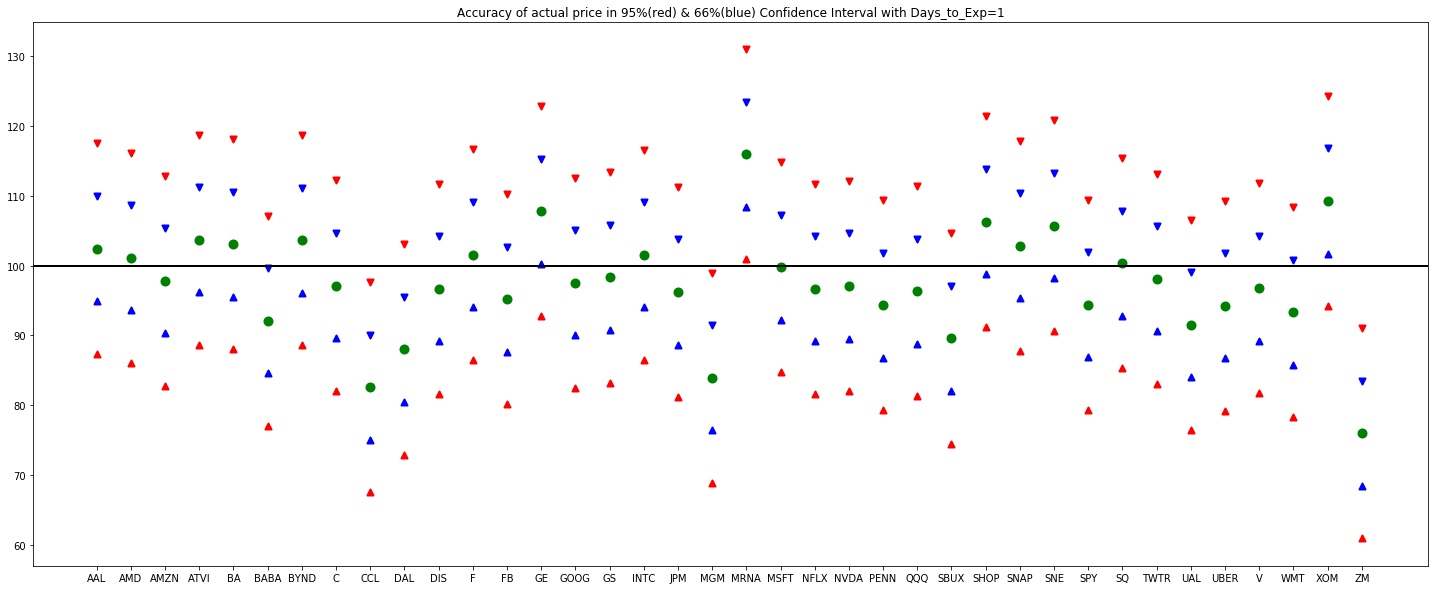

In [37]:
#CONFIDENCE INTERVALS
Option_Analysis_CPSP_graph = Option_Analysis_CPSP4_reset
Analysis_std = Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"].std()

Option_Analysis_CPSP_graph["1sig_left_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
                                                  Analysis_std)
Option_Analysis_CPSP_graph["1sig_right_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
                                                   Analysis_std)

Option_Analysis_CPSP_graph["2sig_left_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
                                                  (2*Analysis_std))
Option_Analysis_CPSP_graph["2sig_right_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
                                                   (2*Analysis_std))

Option_Analysis_CPSP_graph["95%CI_left_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
2*Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]
Option_Analysis_CPSP_graph["95%CI_right_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
2*Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]

Option_Analysis_CPSP_graph["66%CI_left_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]
Option_Analysis_CPSP_graph["66%CI_right_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]

Option_Analysis_CPSP_graph[["Tickers","CPSP","Actual Price @ Expiry","Expected - Actual",\
                      "95%CI_left_tail_$_pred","95%CI_right_tail_$_pred",\
                      "66%CI_left_tail_$_pred","66%CI_right_tail_$_pred"]]

plt.figure(figsize=(25,10))
for x in Option_Analysis_CPSP_graph["Tickers"]:
    
    graphing = Option_Analysis_CPSP_graph.loc[lambda Option_Analysis_CPSP_graph: \
                                           Option_Analysis_CPSP_graph['Tickers']== x, :]
    
    plt.scatter(graphing["Tickers"],graphing["Prediction_Accuracy_%_CPSP"],c="green",linewidths=4)
    plt.scatter(graphing["Tickers"],graphing["2sig_left_%pred"], c="r", marker="^",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["2sig_right_%pred"], c="r", marker="v",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["1sig_left_%pred"], c="b", marker="^",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["1sig_right_%pred"], c="b", marker="v",linewidths=2)
    plt.axhline(y=100, c="k")
    plt.title("Accuracy of actual price in 95%(red) & 66%(blue) Confidence Interval with Days_to_Exp=1")
    plt.show 